If not using google colab, comment

In [3]:
from google.colab import files
var = files.upload()

Saving 2023_data_final.csv to 2023_data_final.csv


In [4]:
df = pd.read_csv("2023_data_final.csv")

# Cleaning the Data Set from Unwanted Values

In [5]:
import pandas as pd

# Load the original CSV file
# If not using google colab, uncomment
#file_path = 'survey_results_public.csv'
#df = pd.read_csv(file_path)

# List of columns to retain
columns_to_keep = [
    'MainBranch', 'Age', 'Employment', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'Country', 'WorkExp', 'Industry', 'ConvertedCompYearly'
]

# Filter the DataFrame to retain only the specified columns
df_filtered = df[columns_to_keep]

# Drop rows with any empty values
df_filtered = df_filtered.dropna()

# Define a function to check validity of data in columns
def is_valid(row):
    invalid_values = {"other", "N/A"}
    # Check for for non-numeric values in numeric columns
    numeric_columns = ['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly']
    for col in numeric_columns:
        if not str(row[col]).replace('.', '', 1).isdigit():  # Check if it's not a number
            return False
    # Check for "other" or "N/A" in any column
    for col in row.index:
        if str(row[col]).lower() in invalid_values:
            return False
    return True

# Apply the function to filter out and remove rows that dont pass validity check from DataFrame
df_filtered = df_filtered[df_filtered.apply(is_valid, axis=1)]

# Save the cleaned DataFrame to a new CSV file
output_file_path = '2023_data.csv'
df_filtered.to_csv(output_file_path, index=False)

print(f"Cleaned data saved to {output_file_path}")


Cleaned data saved to 2023_data.csv


# Determining Unique Values in Columns with Text Entry

In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('2023_data.csv')

# Get the unique values in each specified column
main_branch_unique = df['MainBranch'].unique()
employment_unique = df['Employment'].unique()
ed_level_unique = df['EdLevel'].unique()

# Print the unique values
print("Unique values in 'MainBranch' column:")
print(main_branch_unique)

print("\nUnique values in 'Employment' column:")
print(employment_unique)

print("\nUnique values in 'EdLevel' column:")
print(ed_level_unique)


Unique values in 'MainBranch' column:
['profession' 'not profession']

Unique values in 'Employment' column:
['full-time' 'self-employed' 'full-time and self-employed' 'part-time'
 'full-time, self-employed, and part-time' 'self-employed and part-time'
 'full-time and part-time' 'full-time, self-employed, and retired']

Unique values in 'EdLevel' column:
[5 3 6 2 4 7 1]


# Mapping Unique Values to Shorten Data Set

In [7]:
import pandas as pd

# Load the data
data = pd.read_csv('2023_data.csv')

# Define mappings for categorical variables to numerical values

# Simplified mapping for 'MainBranch'
mainbranch_mapping = {
    'I am a developer by profession': 'profession',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'not profession'
}

# Summarized mapping for 'Employment'
employment_mapping = {
    'Employed, full-time': 'full-time',
    'Independent contractor, freelancer, or self-employed': 'self-employed',
    'Employed, full-time;Independent contractor, freelancer, or self-employed': 'full-time and self-employed',
    'Employed, part-time': 'part-time',
    'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time': 'full-time, self-employed, and part-time',
    'Independent contractor, freelancer, or self-employed;Employed, part-time': 'self-employed and part-time',
    'Employed, full-time;Employed, part-time': 'full-time and part-time',
    'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired': 'full-time, self-employed, and retired'
}

# Ranked mapping for 'EdLevel'
edlevel_mapping = {
    'Primary/elementary school': 1,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
    'Some college/university study without earning a degree': 3,
    'Associate degree (A.A., A.S., etc.)': 4,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 5,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 6,
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 7
}

# Remove rows where 'EdLevel' is 'Something else'
data = data[data['EdLevel'] != 'Something else']

# Replace categorical values with new mappings
data['MainBranch'] = data['MainBranch'].map(mainbranch_mapping)
data['Employment'] = data['Employment'].map(employment_mapping)
data['EdLevel'] = data['EdLevel'].map(edlevel_mapping)

# Save the updated data to a new CSV file
data.to_csv('2023_data_numerical.csv', index=False)

print("Categorical variables replaced and saved to '2023_data_numerical.csv'.")


Categorical variables replaced and saved to '2023_data_numerical.csv'.


# Calculate the Mean, Median, and Mode to Create BoxPlot

Number of outliers: 244
Mean ConvertedCompYearly: 94592.98711217183
Median ConvertedCompYearly: 74963.0
Mode ConvertedCompYearly: 64254.0


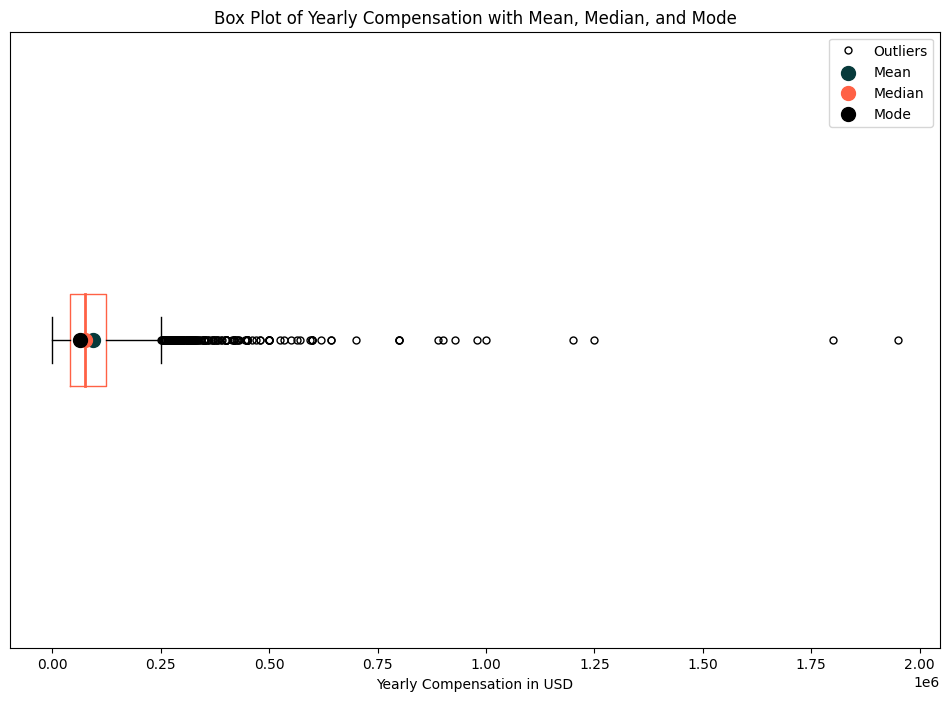

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Convert the 'ConvertedCompYearly' column to numeric, forcing errors to NaN
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop NaN values
df = df.dropna(subset=['ConvertedCompYearly'])

# Calculate mean, median, and mode
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
mode_comp = df['ConvertedCompYearly'].mode()[0]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print("Number of outliers:", len(outliers))

# Print the calculated values
print("Mean ConvertedCompYearly:", mean_comp)
print("Median ConvertedCompYearly:", median_comp)
print("Mode ConvertedCompYearly:", mode_comp)

# Plot the boxplot
plt.figure(figsize=(12, 8))
boxprops = dict(color='#ff6145')  # Color for box and median line
medianprops = dict(color='#ff6145', linewidth=2)
flierprops = dict(marker='o', color='orange', markersize=5, label='Outliers')
plt.boxplot(df['ConvertedCompYearly'], vert=False, boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)

# Plot mean, median, and mode points
plt.scatter(mean_comp, 1, color='#073a3b', s=100, label='Mean', zorder=3)
plt.scatter(median_comp, 1, color='#ff6145', s=100, label='Median', zorder=3)
plt.scatter(mode_comp, 1, color='#000000', s=100, label='Mode', zorder=3)

# Customize y-axis and title
plt.yticks([])  # Remove y-axis text
plt.xlabel("Yearly Compensation in USD")
plt.title("Box Plot of Yearly Compensation with Mean, Median, and Mode")
plt.legend()

# Show plot
plt.show()

Removing Outliers from BoxPlot

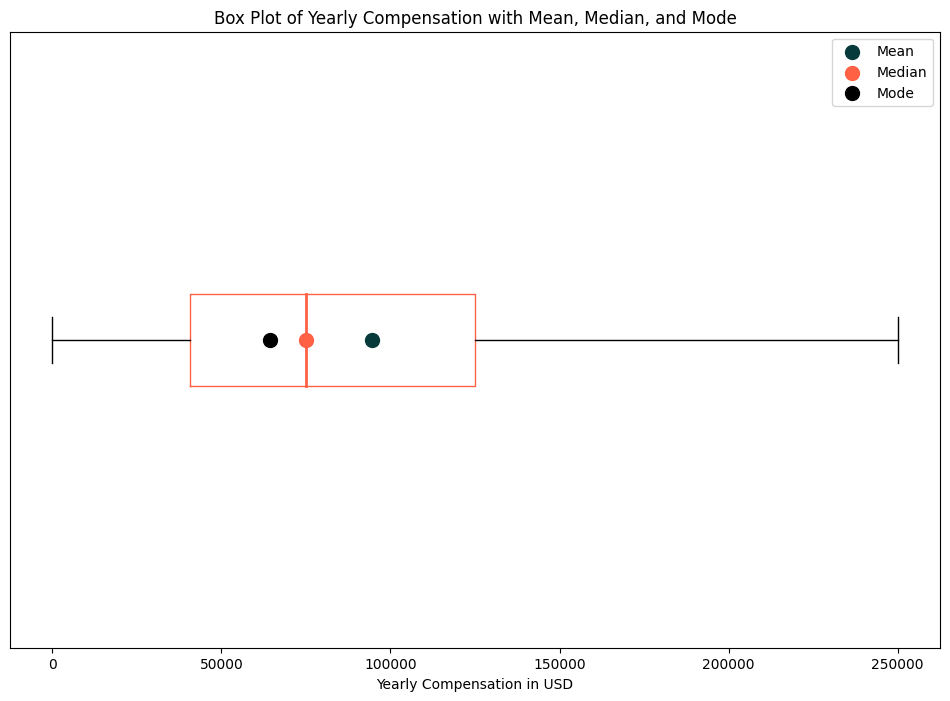

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Convert the 'ConvertedCompYearly' column to numeric, forcing errors to NaN
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop NaN values
df = df.dropna(subset=['ConvertedCompYearly'])

# Calculate mean, median, and mode
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
mode_comp = df['ConvertedCompYearly'].mode()[0]

# Plot the boxplot
plt.figure(figsize=(12, 8))
boxprops = dict(color='#ff6145')  # Color for box and median line
medianprops = dict(color='#ff6145', linewidth=2)
plt.boxplot(df['ConvertedCompYearly'], vert=False, boxprops=boxprops, medianprops=medianprops, showfliers=False)

# Plot mean, median, and mode points
plt.scatter(mean_comp, 1, color='#073a3b', s=100, label='Mean', zorder=3)
plt.scatter(median_comp, 1, color='#ff6145', s=100, label='Median', zorder=3)
plt.scatter(mode_comp, 1, color='#000000', s=100, label='Mode', zorder=3)

# Customize y-axis and title
plt.yticks([])  # Remove y-axis text
plt.xlabel("Yearly Compensation in USD")
plt.title("Box Plot of Yearly Compensation with Mean, Median, and Mode")
plt.legend()

# Show plot
plt.show()

# Splitting Columns for Detailed and Fair Analysis

Splitting Employment Column

In [10]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

unique_employment_values = df_filtered['Employment'].unique()
print("Unique values in 'Employment' column:")
print(unique_employment_values)
print("")

# Create a dictionary to store DataFrames for each employment type
employment_dataframes = {}

# Split the data into separate DataFrames for each unique employment type
for employment_type in unique_employment_values:
    df_employment_type = df_filtered[df_filtered['Employment'] == employment_type]
    employment_dataframes[employment_type] = len(df_employment_type)

# Sort the employment types by the number of people in descending order
sorted_employment = sorted(employment_dataframes.items(), key=lambda item: item[1], reverse=True)

# Print the number of people in each employment type, ordered by the most people first
print("Number of people in different employment types:")
for employment_type, count in sorted_employment:
    print(f"{employment_type}: {count}")


Unique values in 'Employment' column:
['full-time' 'self-employed' 'full-time and self-employed' 'part-time'
 'full-time, self-employed, and part-time' 'self-employed and part-time'
 'full-time and part-time' 'full-time, self-employed, and retired']

Number of people in different employment types:
full-time: 5070
full-time and self-employed: 671
self-employed: 371
part-time: 91
self-employed and part-time: 38
full-time, self-employed, and part-time: 23
full-time and part-time: 19
full-time, self-employed, and retired: 2


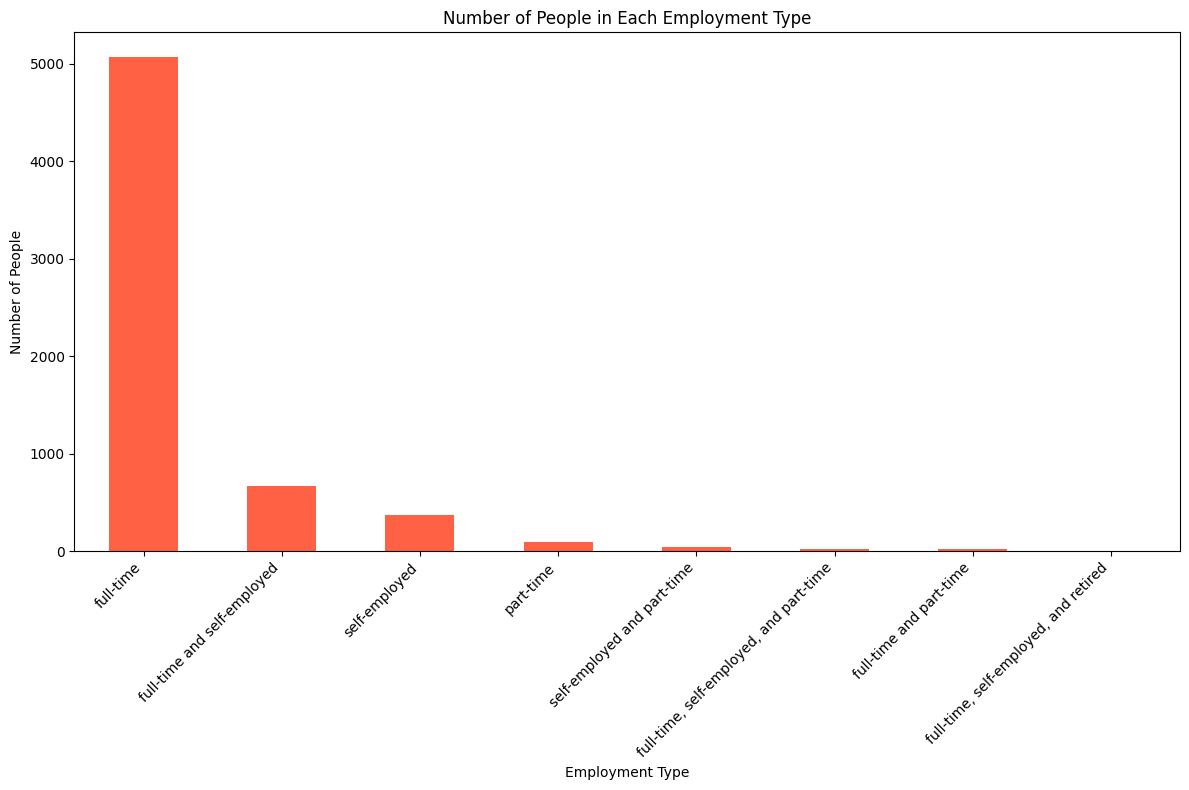

In [11]:
# Bar graph for visualization

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Count the number of people in each employment type
employment_counts = df['Employment'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 8))
employment_counts.plot(kind='bar', color='#ff6145')
plt.title('Number of People in Each Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Splitting Industry Column

In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Get all unique values in the "Industry" column
unique_industry_values = df_filtered['Industry'].unique()
print("Unique values in 'Industry' column:")
print(unique_industry_values)
print("")

# Create a dictionary to store DataFrames for each industry type
industry_dataframes = {}

# Split the data into separate DataFrames for each unique industry type
for industry_type in unique_industry_values:
    df_industry_type = df_filtered[df_filtered['Industry'] == industry_type]
    industry_dataframes[industry_type] = len(df_industry_type)

# Sort the industries by the number of people in descending order
sorted_industries = sorted(industry_dataframes.items(), key=lambda item: item[1], reverse=True)

# Print the number of people in each industry type, ordered by the most people first
print("Number of people in different industries:")
for industry_type, count in sorted_industries:
    print(f"{industry_type}: {count}")


Unique values in 'Industry' column:
['Information Services, IT, Software Development, or other Technology'
 'Financial Services' 'Manufacturing, Transportation, or Supply Chain'
 'Retail and Consumer Services' 'Legal Services' 'Higher Education'
 'Healthcare' 'Oil & Gas' 'Insurance' 'Advertising Services' 'Wholesale']

Number of people in different industries:
Information Services, IT, Software Development, or other Technology: 3513
Financial Services: 805
Healthcare: 467
Manufacturing, Transportation, or Supply Chain: 433
Retail and Consumer Services: 407
Higher Education: 219
Advertising Services: 179
Insurance: 127
Oil & Gas: 52
Legal Services: 44
Wholesale: 39


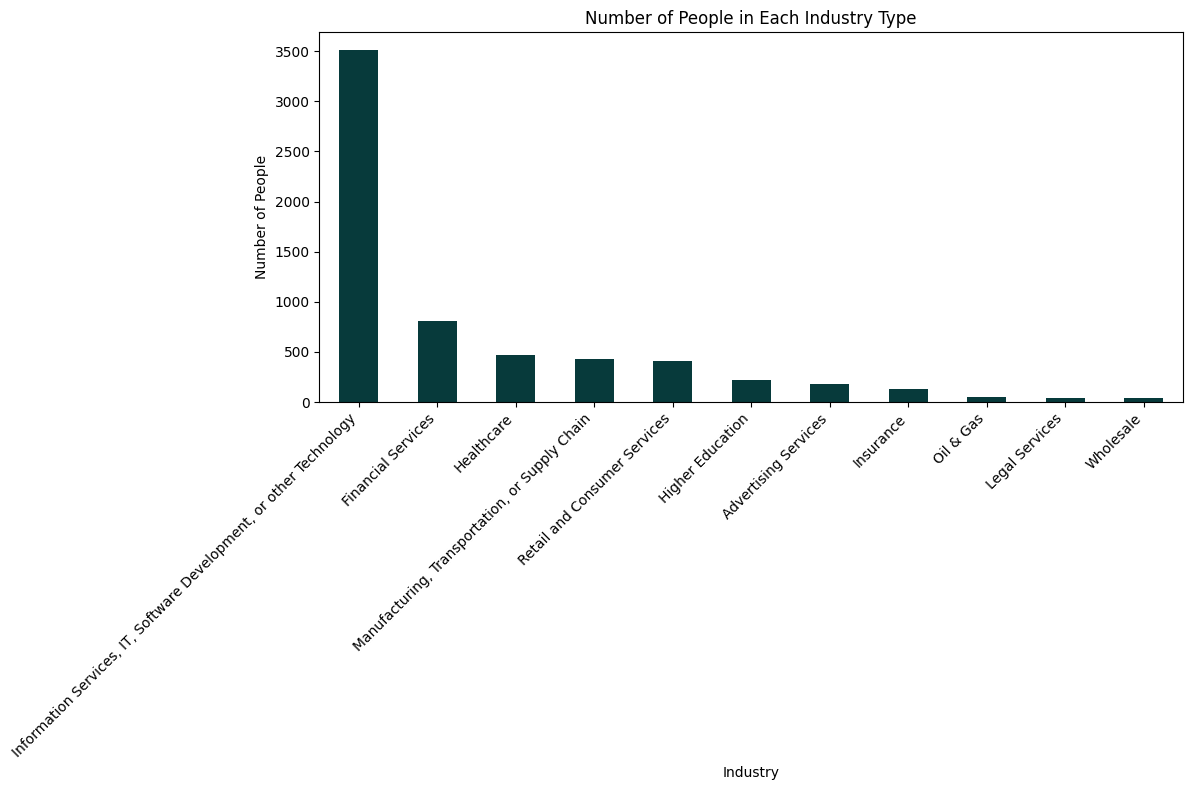

In [13]:
# Bar graph for visualization

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Count the number of people in each industry type
industry_counts = df['Industry'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 8))
industry_counts.plot(kind='bar', color='#073a3b')
plt.title('Number of People in Each Industry Type')
plt.xlabel('Industry')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Graphs

## Bar Graphs

Bar Graphs in General

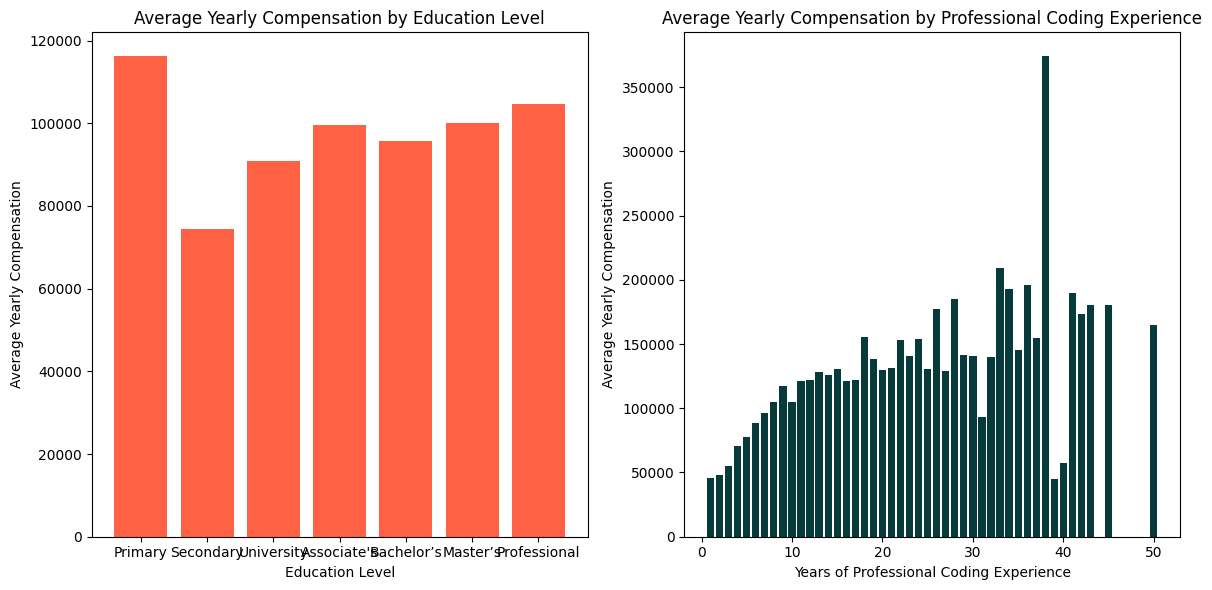

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Filter the DataFrame to include only full-time employees
full_time_df = df[df['Employment'] == 'full-time']

# Group by education level and calculate the average yearly compensation
edu_avg_comp = full_time_df.groupby('EdLevel')['ConvertedCompYearly'].mean()

# Group by professional coding experience category and calculate the average yearly compensation
exp_avg_comp = full_time_df.groupby('YearsCodePro')['ConvertedCompYearly'].mean()

# Education level mapping
edu_level_mapping = {
    1: 'Primary',
    2: 'Secondary',
    3: 'University',
    4: "Associate's",
    5: 'Bachelor’s',
    6: 'Master’s',
    7: 'Professional'
}

# Apply the mapping to the education levels
edu_avg_comp.index = edu_avg_comp.index.map(edu_level_mapping)

# Plotting bar graphs for education level
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(edu_avg_comp.index, edu_avg_comp.values, color='#ff6145')
plt.title('Average Yearly Compensation by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Yearly Compensation')

# Plotting bar graphs for professional coding experience category
plt.subplot(1, 2, 2)
plt.bar(exp_avg_comp.index, exp_avg_comp.values, color='#073a3b')
plt.title('Average Yearly Compensation by Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Average Yearly Compensation')

plt.tight_layout()
plt.show()

Bar Graphs for Fully Employed

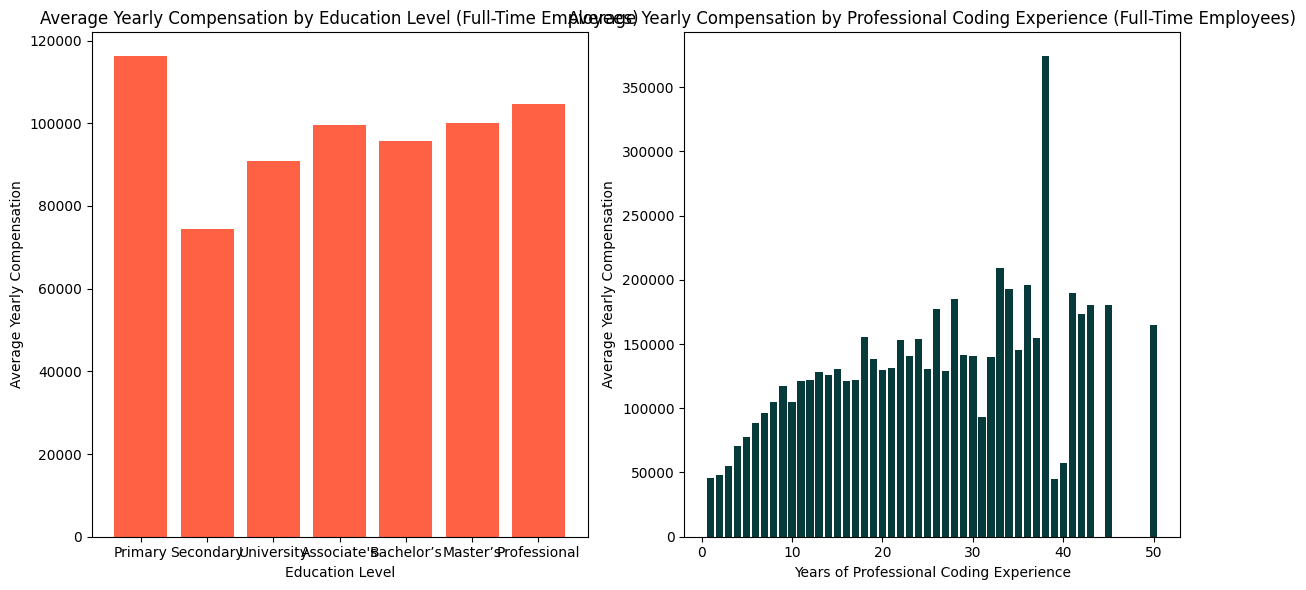

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Filter the DataFrame to include only full-time employees
full_time_df = df[df['Employment'] == 'full-time']

# Group by education level and calculate the average yearly compensation
edu_avg_comp = full_time_df.groupby('EdLevel')['ConvertedCompYearly'].mean()

# Group by professional coding experience category and calculate the average yearly compensation
exp_avg_comp = full_time_df.groupby('YearsCodePro')['ConvertedCompYearly'].mean()

# Education level mapping
edu_level_mapping = {
    1: 'Primary',
    2: 'Secondary',
    3: 'University',
    4: "Associate's",
    5: 'Bachelor’s',
    6: 'Master’s',
    7: 'Professional'
}

# Apply the mapping to the education levels
edu_avg_comp.index = edu_avg_comp.index.map(edu_level_mapping)

# Plotting bar graphs for education level
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(edu_avg_comp.index, edu_avg_comp.values, color='#ff6145')
plt.title('Average Yearly Compensation by Education Level (Full-Time Employees)')
plt.xlabel('Education Level')
plt.ylabel('Average Yearly Compensation')

# Plotting bar graphs for professional coding experience category
plt.subplot(1, 2, 2)
plt.bar(exp_avg_comp.index, exp_avg_comp.values, color='#073a3b')
plt.title('Average Yearly Compensation by Professional Coding Experience (Full-Time Employees)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Average Yearly Compensation')

plt.tight_layout()
plt.show()

Bar Graphs for Self Employed

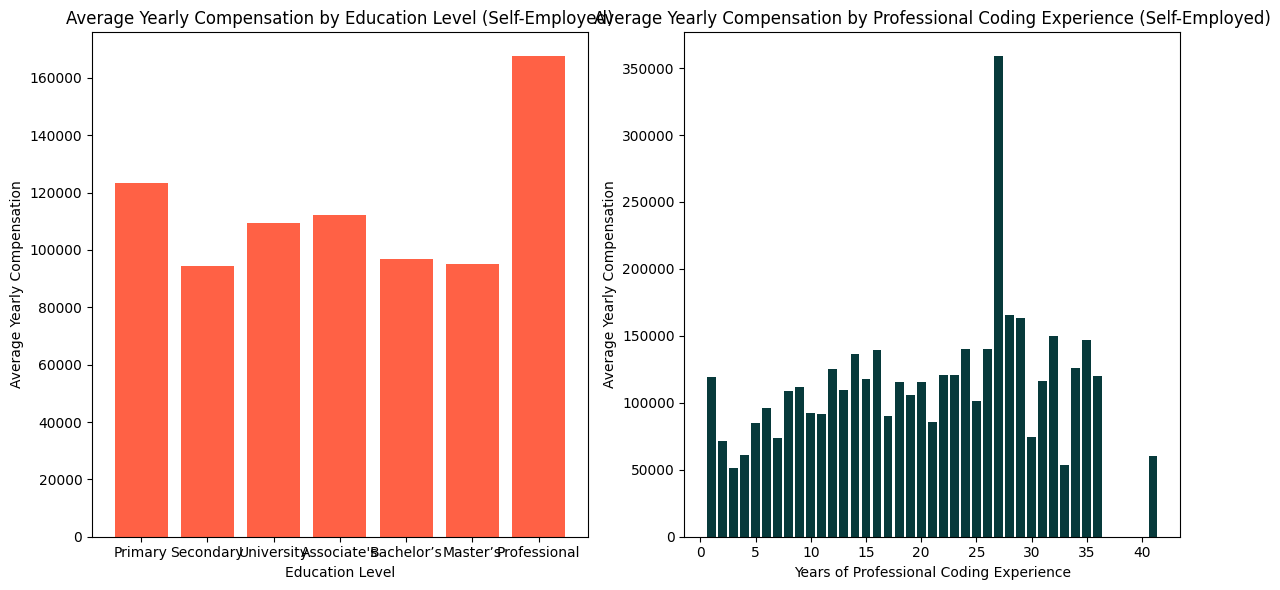

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Filter the DataFrame to include only self-employed individuals
self_employed_df = df[df['Employment'] == 'self-employed']

# Group by education level and calculate the average yearly compensation
edu_avg_comp = self_employed_df.groupby('EdLevel')['ConvertedCompYearly'].mean()

# Group by professional coding experience category and calculate the average yearly compensation
exp_avg_comp = self_employed_df.groupby('YearsCodePro')['ConvertedCompYearly'].mean()

# Education level mapping
edu_level_mapping = {
    1: 'Primary',
    2: 'Secondary',
    3: 'University',
    4: "Associate's",
    5: 'Bachelor’s',
    6: 'Master’s',
    7: 'Professional'
}

# Apply the mapping to the education levels
edu_avg_comp.index = edu_avg_comp.index.map(edu_level_mapping)

# Plotting bar graphs for education level
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(edu_avg_comp.index, edu_avg_comp.values, color='#ff6145')
plt.title('Average Yearly Compensation by Education Level (Self-Employed)')
plt.xlabel('Education Level')
plt.ylabel('Average Yearly Compensation')

# Plotting bar graphs for professional coding experience category
plt.subplot(1, 2, 2)
plt.bar(exp_avg_comp.index, exp_avg_comp.values, color='#073a3b')
plt.title('Average Yearly Compensation by Professional Coding Experience (Self-Employed)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Average Yearly Compensation')

plt.tight_layout()
plt.show()

Bar Graphs for Top 3 Industries

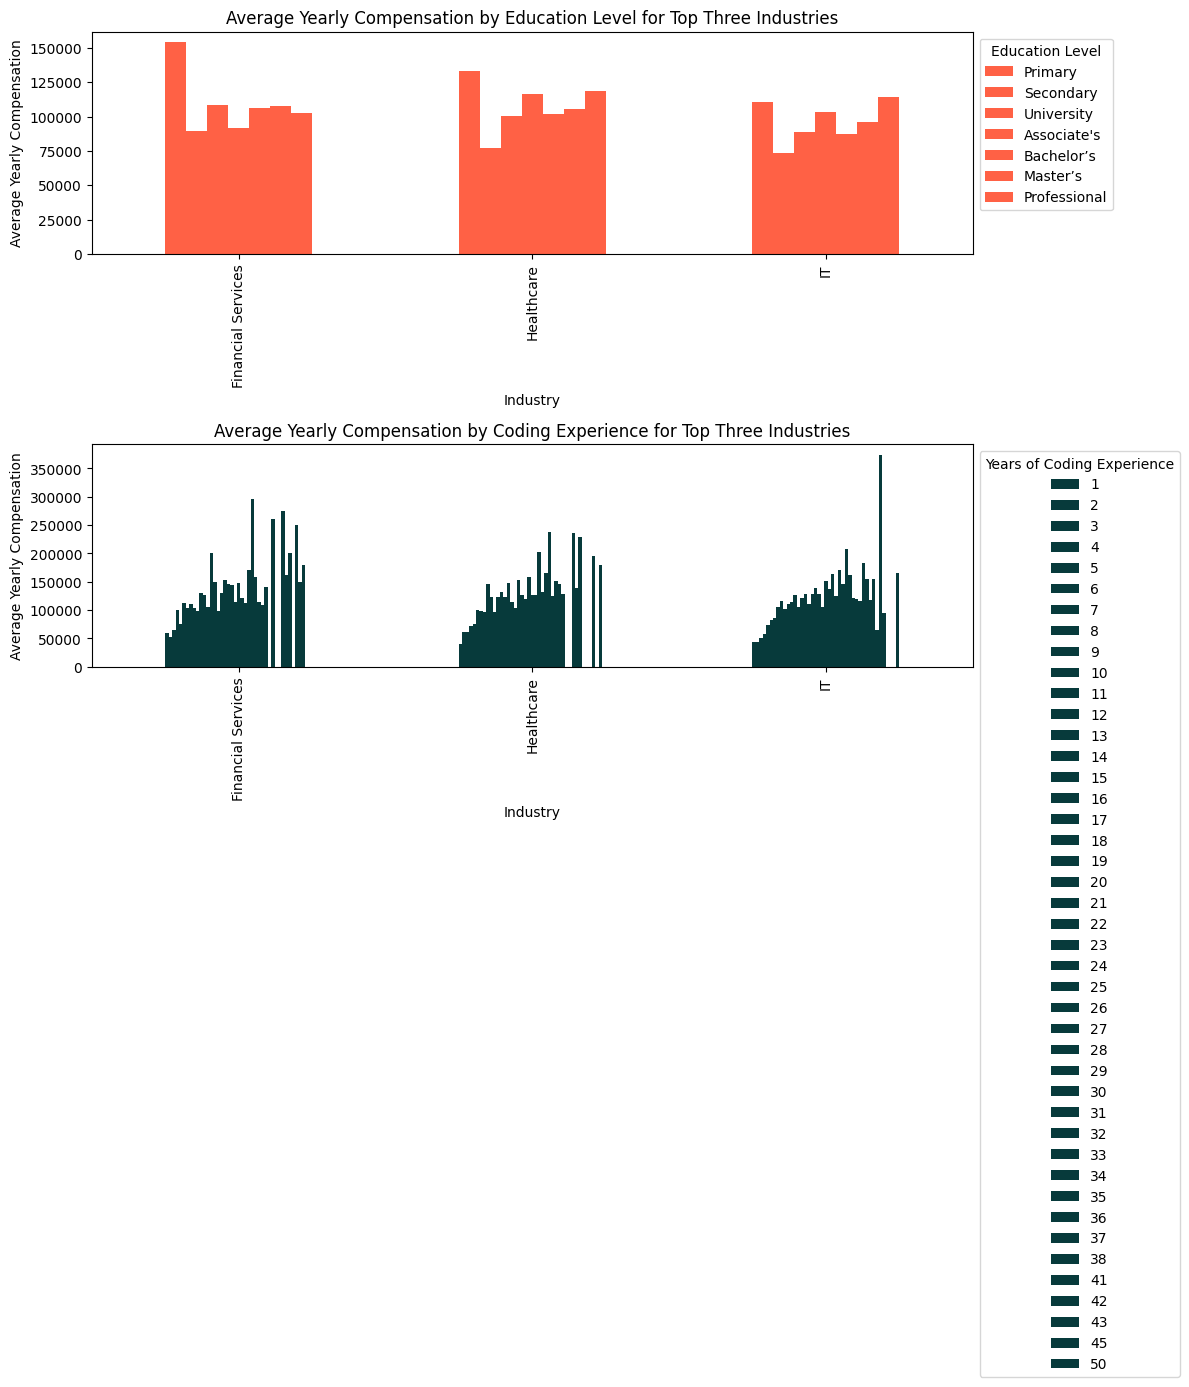

   Number Education Level
0       1         Primary
1       2       Secondary
2       3      University
3       4     Associate's
4       5      Bachelor’s
5       6        Master’s
6       7    Professional


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Replace the full industry name with 'IT'
df['Industry'] = df['Industry'].replace('Information Services, IT, Software Development, or other Technology', 'IT')

# Filter the DataFrame to include only the top three industries
top_industries = ['IT', 'Financial Services', 'Healthcare']
top_industries_df = df[df['Industry'].isin(top_industries)]

# Education level mapping
edu_level_mapping = {
    1: 'Primary',
    2: 'Secondary',
    3: 'University',
    4: "Associate's",
    5: 'Bachelor’s',
    6: 'Master’s',
    7: 'Professional'
}

# Group by education level and industry, then calculate the average yearly compensation
industry_edu_avg_comp = top_industries_df.groupby(['Industry', 'EdLevel'])['ConvertedCompYearly'].mean().unstack()

# Apply the mapping to the education levels
industry_edu_avg_comp.columns = industry_edu_avg_comp.columns.map(edu_level_mapping)

# Plotting bar graph for the top three industries by education level
plt.figure(figsize=(12, 12))

# Plotting the first set of bar graphs for education levels
plt.subplot(2, 1, 1)
colors = ['#ff6145'] * len(industry_edu_avg_comp.columns)
industry_edu_avg_comp.plot(kind='bar', color=colors, ax=plt.gca())
plt.title('Average Yearly Compensation by Education Level for Top Three Industries')
plt.xlabel('Industry')
plt.ylabel('Average Yearly Compensation')
plt.legend(title='Education Level', bbox_to_anchor=(1, 1))

# Group by professional coding experience and industry, then calculate the average yearly compensation
industry_exp_avg_comp = top_industries_df.groupby(['Industry', 'YearsCodePro'])['ConvertedCompYearly'].mean().unstack()

# Plotting the second set of bar graphs for coding experience levels
plt.subplot(2, 1, 2)
colors_exp = ['#073a3b'] * len(industry_exp_avg_comp.columns)
industry_exp_avg_comp.plot(kind='bar', color=colors_exp, ax=plt.gca())
plt.title('Average Yearly Compensation by Coding Experience for Top Three Industries')
plt.xlabel('Industry')
plt.ylabel('Average Yearly Compensation')
plt.legend(title='Years of Coding Experience', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Displaying the education level mapping as a table
edu_mapping_df = pd.DataFrame(list(edu_level_mapping.items()), columns=['Number', 'Education Level'])
print(edu_mapping_df)

## Box Plots

Box Plot Showing Compensation in Each Industry

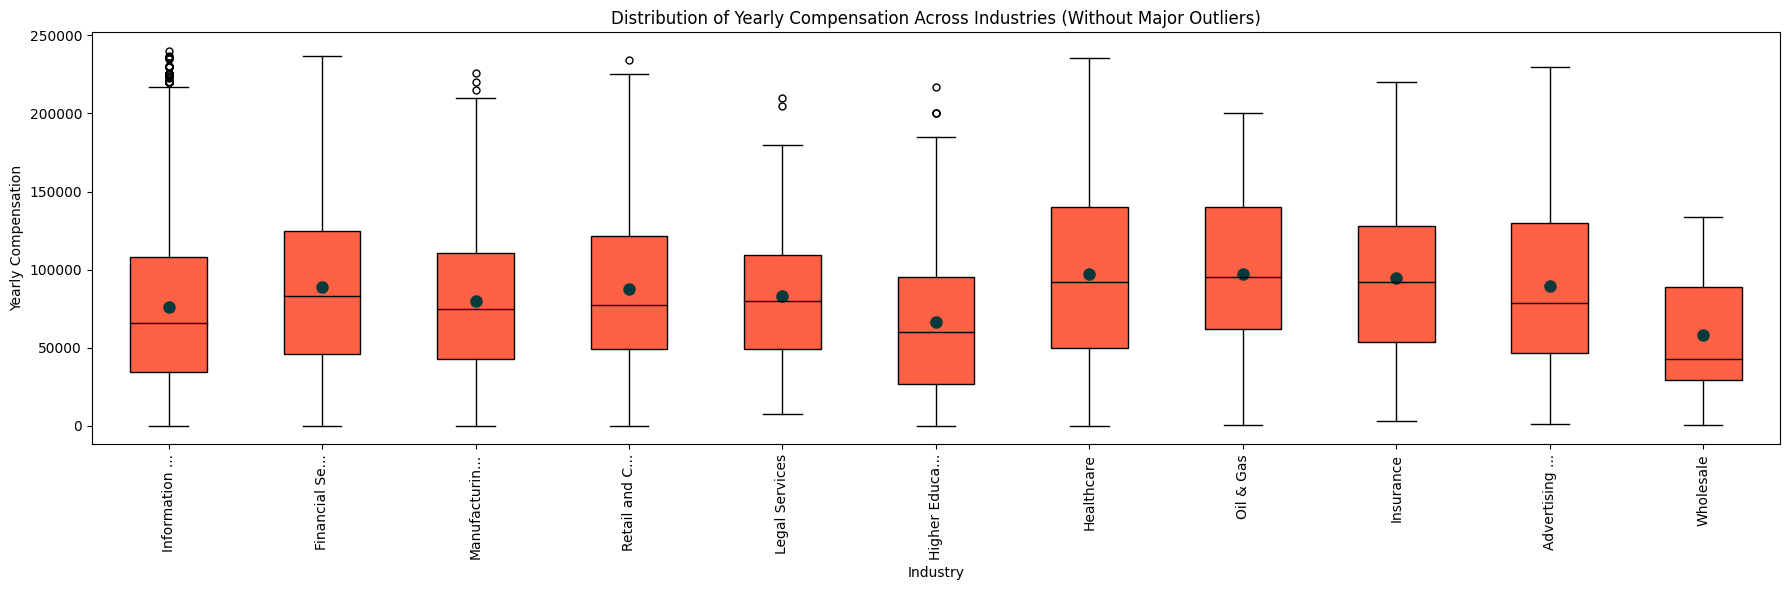

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Set a threshold for outliers (e.g., values above the 95th percentile)
threshold = df['ConvertedCompYearly'].quantile(0.95)

# Filter out major outliers
df_filtered = df[df['ConvertedCompYearly'] <= threshold]

# Truncate long industry names for better readability on the y-axis
def truncate_label(label, length=15):
    if len(label) > length:
        return label[:length-3] + '...'
    else:
        return label

# Get unique industries
industries = df_filtered['Industry'].unique()

# Prepare data for box plots
data = [df_filtered[df_filtered['Industry'] == industry]['ConvertedCompYearly'] for industry in industries]
labels = [truncate_label(industry) for industry in industries]

# Create a box plot for every single industry without major outliers
plt.figure(figsize=(18, 6))
boxplot = plt.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='#ff6145', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(marker='o', color='black', markersize=5, linestyle='none'),
            medianprops=dict(color='black'))

# Calculate and plot the mean for each industry
means = [df_filtered[df_filtered['Industry'] == industry]['ConvertedCompYearly'].mean() for industry in industries]
for i, mean in enumerate(means):
    plt.plot(i + 1, mean, marker='o', color='#073a3b', markersize=8)

plt.xticks(rotation=90)
plt.title('Distribution of Yearly Compensation Across Industries (Without Major Outliers)')
plt.xlabel('Industry')
plt.ylabel('Yearly Compensation')
plt.tight_layout()
plt.show()

Box Plot Showing Compensation of Each Employment Type

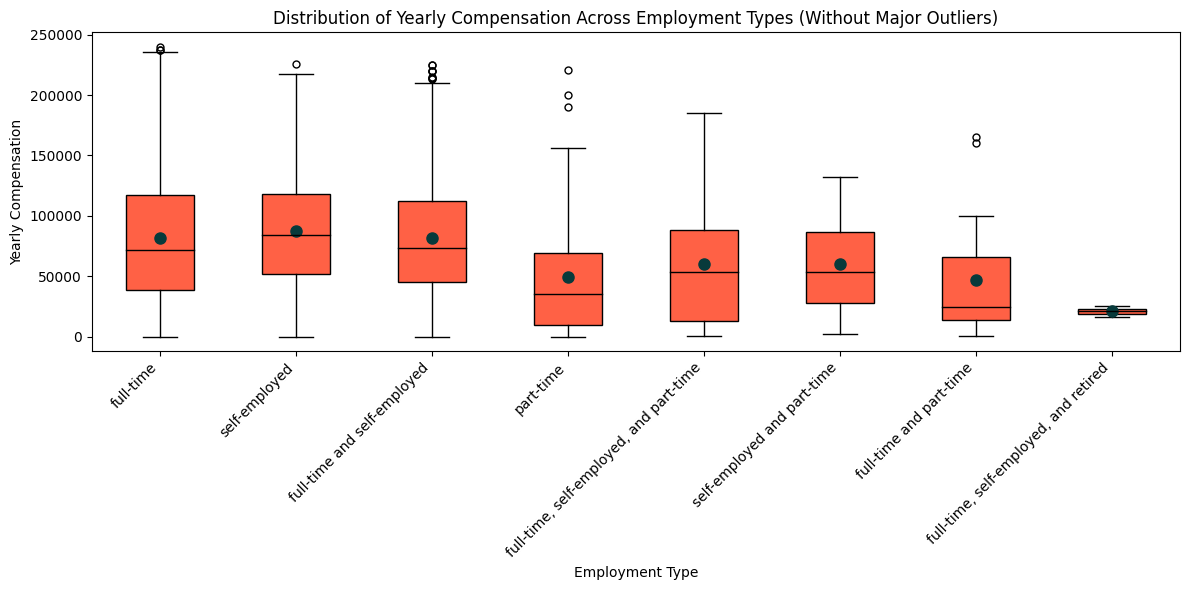

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Set a threshold for outliers (e.g., values above the 95th percentile)
threshold = df['ConvertedCompYearly'].quantile(0.95)

# Filter out major outliers
df_filtered = df[df['ConvertedCompYearly'] <= threshold]

# Get unique employment types
employment_types = df_filtered['Employment'].unique()

# Prepare data for box plots
data = [df_filtered[df_filtered['Employment'] == employment]['ConvertedCompYearly'] for employment in employment_types]

# Create a box plot for every employment type without major outliers
plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(data, labels=employment_types, patch_artist=True,
            boxprops=dict(facecolor='#ff6145', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(marker='o', color='black', markersize=5, linestyle='none'),
            medianprops=dict(color='black'))

# Calculate and plot the mean for each employment type
means = [df_filtered[df_filtered['Employment'] == employment]['ConvertedCompYearly'].mean() for employment in employment_types]
for i, mean in enumerate(means):
    plt.plot(i + 1, mean, marker='o', color='#073a3b', markersize=8)

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Yearly Compensation Across Employment Types (Without Major Outliers)')
plt.xlabel('Employment Type')
plt.ylabel('Yearly Compensation')
plt.tight_layout()
plt.show()

## Correlation Coefficient

Correlation Coefficient General

In [20]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')


# Calculate correlation coefficient between yearly compensation and years of professional coding experience
experience_corr = df['ConvertedCompYearly'].corr(df['YearsCodePro'])

# Calculate correlation coefficient between yearly compensation and education level
edu_corr = df['ConvertedCompYearly'].corr(df['EdLevel'])

print(f"Correlation between yearly compensation and years of professional coding experience: {experience_corr}")
print(f"Correlation between yearly compensation and education level: {edu_corr}")

Correlation between yearly compensation and years of professional coding experience: 0.31566640782455757
Correlation between yearly compensation and education level: 0.033433928207231574


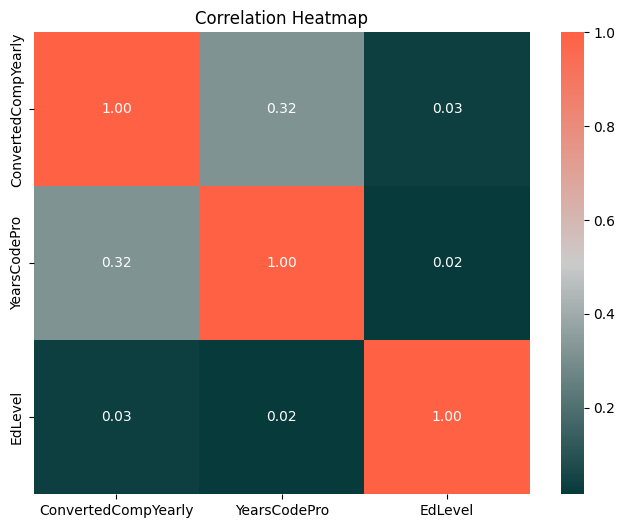

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Calculate correlation matrix
corr_matrix = df[['ConvertedCompYearly', 'YearsCodePro', 'EdLevel']].corr()

# Create a custom colormap
colors = ['#073a3b', '#cbcbcb', '#ff6145']  # Use your desired color
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation Cooeficient Fully Employed

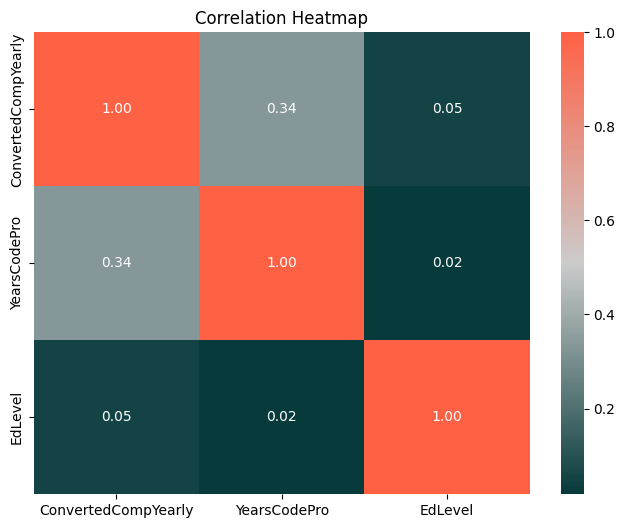

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Filter the DataFrame to include only full-time employees
full_time_df = df[df['Employment'] == 'full-time']

# Calculate correlation matrix
corr_matrix = full_time_df[['ConvertedCompYearly', 'YearsCodePro', 'EdLevel']].corr()

# Create a custom colormap
colors = ['#073a3b', '#cbcbcb', '#ff6145']  # Use your desired color
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation Cooeficient Self Employed

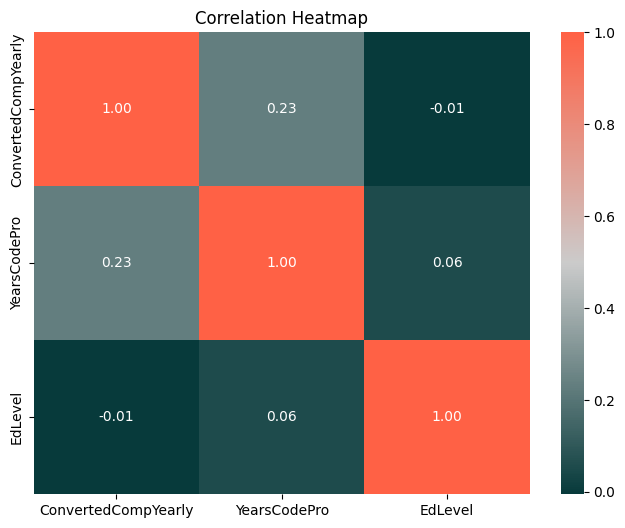

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Filter the DataFrame to include only full-time employees
full_time_df = df[df['Employment'] == 'self-employed']

# Calculate correlation matrix
corr_matrix = full_time_df[['ConvertedCompYearly', 'YearsCodePro', 'EdLevel']].corr()

# Create a custom colormap
colors = ['#073a3b', '#cbcbcb', '#ff6145']  # Use your desired color
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation Cooeficient Top 3 Industries

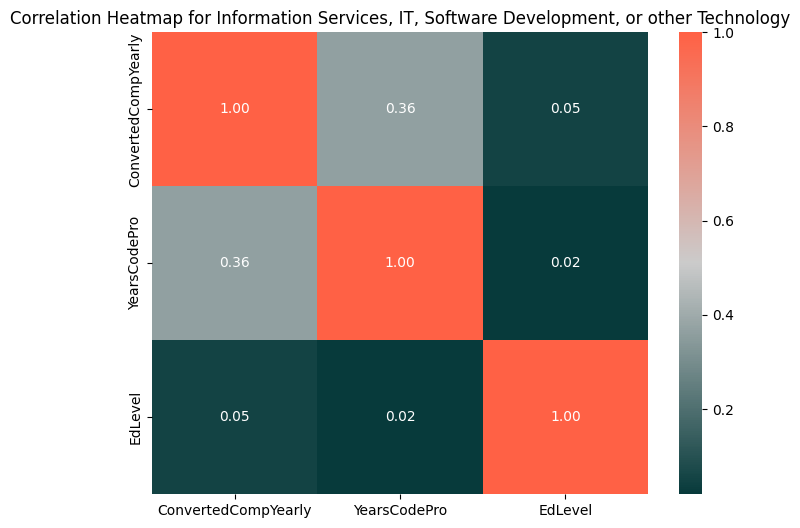

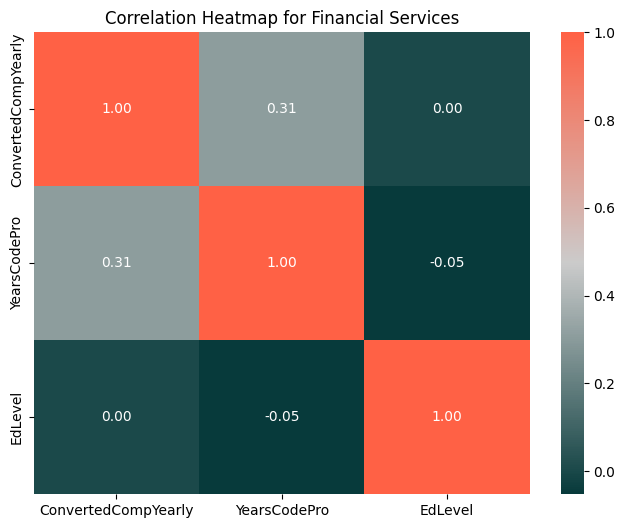

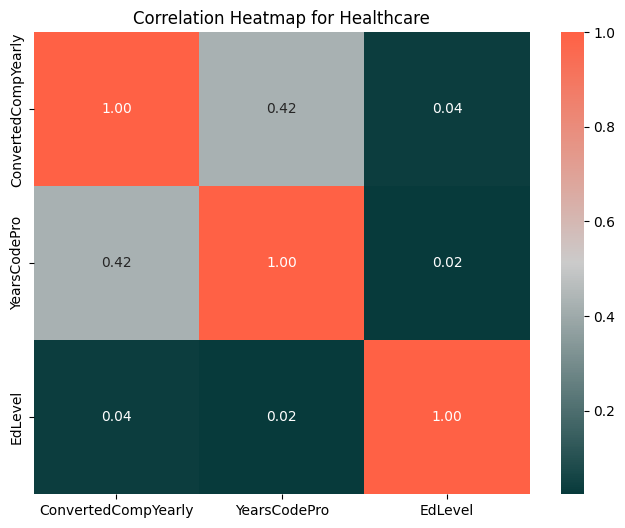

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Filter the DataFrame to include only the top 3 industries
top_industries = ['Information Services, IT, Software Development, or other Technology', 'Financial Services', 'Healthcare']
top_industries_df = df[df['Industry'].isin(top_industries)]

# Calculate correlation matrix for each industry
correlation_matrices = {}
for industry in top_industries:
    industry_df = top_industries_df[top_industries_df['Industry'] == industry]
    corr_matrix = industry_df[['ConvertedCompYearly', 'YearsCodePro', 'EdLevel']].corr()
    correlation_matrices[industry] = corr_matrix

# Create a custom colormap
colors = ['#073a3b', '#cbcbcb', '#ff6145']  # Use your desired color
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Plot heatmaps for each industry
for industry, corr_matrix in correlation_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")
    plt.title(f'Correlation Heatmap for {industry}')
    plt.show()

## Scatter

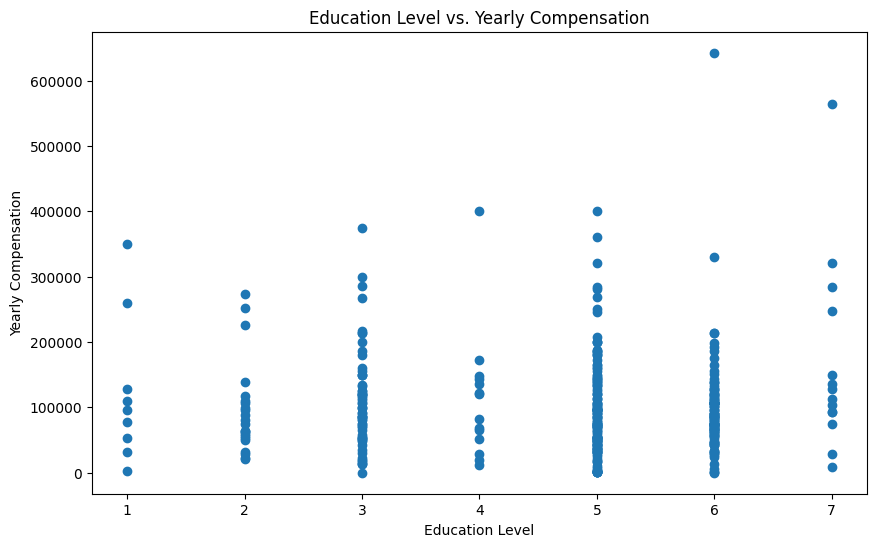

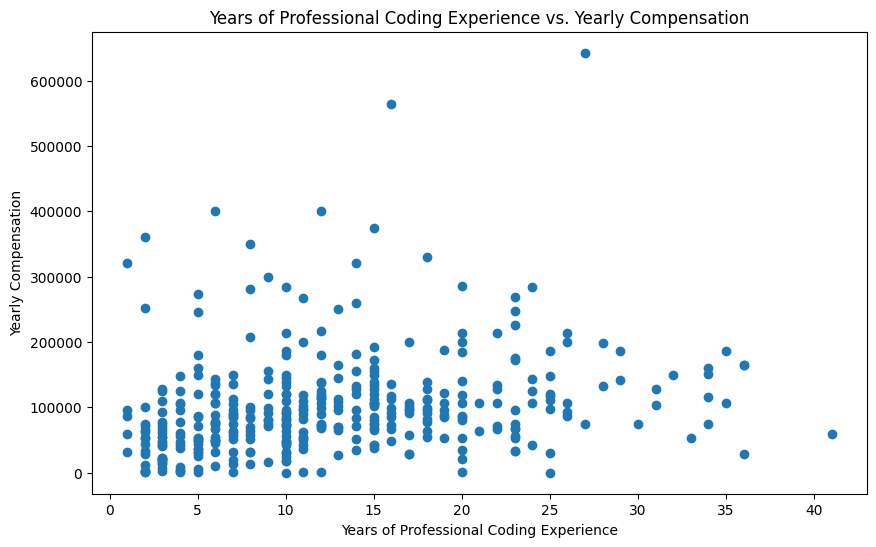

In [25]:
import matplotlib.pyplot as plt

# Scatter plot for Education Level vs. Yearly Compensation
plt.figure(figsize=(10, 6))
plt.scatter(full_time_df['EdLevel'], full_time_df['ConvertedCompYearly'])
plt.xlabel('Education Level')
plt.ylabel('Yearly Compensation')
plt.title('Education Level vs. Yearly Compensation')
plt.show()

# Scatter plot for Years of Professional Coding Experience vs. Yearly Compensation
plt.figure(figsize=(10, 6))
plt.scatter(full_time_df['YearsCodePro'], full_time_df['ConvertedCompYearly'])
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Yearly Compensation')
plt.title('Years of Professional Coding Experience vs. Yearly Compensation')
plt.show()

### Hypothesis Testing

Finding P-Values for General Data

In [26]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Define the independent variables and dependent variable
X = df[['YearsCodePro', 'EdLevel']]
y = df['ConvertedCompYearly']

# Add a constant to the independent variables matrix (for the intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.100
Model:                             OLS   Adj. R-squared:                  0.100
Method:                  Least Squares   F-statistic:                     350.8
Date:                 Sun, 26 May 2024   Prob (F-statistic):          3.77e-145
Time:                         20:33:46   Log-Likelihood:                -80330.
No. Observations:                 6285   AIC:                         1.607e+05
Df Residuals:                     6282   BIC:                         1.607e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.721e+04   4510.603    

In [27]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Function to print p-values in a readable format
def print_pvalues(pvalues, title):
    print(f"{title}")
    for variable, pvalue in pvalues.items():
        print(f"{variable:15} {pvalue:.3f}")

X_general = df[['YearsCodePro', 'EdLevel']]
y_general = df['ConvertedCompYearly']
X_general = sm.add_constant(X_general)
model_general = sm.OLS(y_general, X_general).fit()
p_values_general = model_general.pvalues


# Print p-values for self-employed people
print_pvalues(p_values_general, "P-values for General Data")

P-values for General Data
const           0.000
YearsCodePro    0.000
EdLevel         0.017


Finding P-Values for Fully Employed

In [28]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Filter the DataFrame to include only full-time employees
full_time_df = df[df['Employment'] == 'full-time']

# Define the independent variables and dependent variable
X = full_time_df[['YearsCodePro', 'EdLevel']]
y = full_time_df['ConvertedCompYearly']

# Add a constant to the independent variables matrix (for the intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.114
Model:                             OLS   Adj. R-squared:                  0.114
Method:                  Least Squares   F-statistic:                     327.2
Date:                 Sun, 26 May 2024   Prob (F-statistic):          2.22e-134
Time:                         20:33:49   Log-Likelihood:                -64755.
No. Observations:                 5070   AIC:                         1.295e+05
Df Residuals:                     5067   BIC:                         1.295e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.04e+04   5052.717    

In [29]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Function to print p-values in a readable format
def print_pvalues(pvalues, title):
    print(f"{title}")
    for variable, pvalue in pvalues.items():
        print(f"{variable:15} {pvalue:.3f}")

# Self-Employed People
self_employed_df = df[df['Employment'] == 'full-time']
X_self_employed = self_employed_df[['YearsCodePro', 'EdLevel']]
y_self_employed = self_employed_df['ConvertedCompYearly']
X_self_employed = sm.add_constant(X_self_employed)
model_self_employed = sm.OLS(y_self_employed, X_self_employed).fit()
p_values_self_employed = model_self_employed.pvalues


# Print p-values for self-employed people
print_pvalues(p_values_self_employed, "P-values for Self-Employed People")

P-values for Self-Employed People
const           0.000
YearsCodePro    0.000
EdLevel         0.001


Finding P-Values for Self Employed

In [30]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Filter the DataFrame to include only self-employed people
self_employed_df = df[df['Employment'] == 'self-employed']

# Define the independent variables and dependent variable
X_self_employed = self_employed_df[['YearsCodePro', 'EdLevel']]
y_self_employed = self_employed_df['ConvertedCompYearly']

# Add a constant to the independent variables matrix (for the intercept term)
X_self_employed = sm.add_constant(X_self_employed)

# Fit the regression model
model_self_employed = sm.OLS(y_self_employed, X_self_employed).fit()

# Display the summary of the regression
print("Self-Employed People Regression Analysis")
print(model_self_employed.summary())

Self-Employed People Regression Analysis
                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.055
Model:                             OLS   Adj. R-squared:                  0.050
Method:                  Least Squares   F-statistic:                     10.69
Date:                 Sun, 26 May 2024   Prob (F-statistic):           3.07e-05
Time:                         20:33:53   Log-Likelihood:                -4702.0
No. Observations:                  371   AIC:                             9410.
Df Residuals:                      368   BIC:                             9422.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [31]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Function to print p-values in a readable format
def print_pvalues(pvalues, title):
    print(f"{title}")
    for variable, pvalue in pvalues.items():
        print(f"{variable:15} {pvalue:.3f}")

# Self-Employed People
self_employed_df = df[df['Employment'] == 'self-employed']
X_self_employed = self_employed_df[['YearsCodePro', 'EdLevel']]
y_self_employed = self_employed_df['ConvertedCompYearly']
X_self_employed = sm.add_constant(X_self_employed)
model_self_employed = sm.OLS(y_self_employed, X_self_employed).fit()
p_values_self_employed = model_self_employed.pvalues


# Print p-values for self-employed people
print_pvalues(p_values_self_employed, "P-values for Self-Employed People")

P-values for Self-Employed People
const           0.000
YearsCodePro    0.000
EdLevel         0.719


Finding P-Values for Leading Industry (IT)

In [32]:
# Filter the DataFrame to include only the leading industry
leading_industry = 'Information Services, IT, Software Development, or other Technology'
leading_industry_df = df[df['Industry'] == leading_industry]

# Define the independent variables and dependent variable
X_leading_industry = leading_industry_df[['YearsCodePro', 'EdLevel']]
y_leading_industry = leading_industry_df['ConvertedCompYearly']

# Add a constant to the independent variables matrix (for the intercept term)
X_leading_industry = sm.add_constant(X_leading_industry)

# Fit the regression model
model_leading_industry = sm.OLS(y_leading_industry, X_leading_industry).fit()

# Display the summary of the regression
print("Leading Industry Regression Analysis")
print(model_leading_industry.summary())

Leading Industry Regression Analysis
                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.135
Model:                             OLS   Adj. R-squared:                  0.134
Method:                  Least Squares   F-statistic:                     273.4
Date:                 Sun, 26 May 2024   Prob (F-statistic):          4.52e-111
Time:                         20:33:57   Log-Likelihood:                -44564.
No. Observations:                 3513   AIC:                         8.913e+04
Df Residuals:                     3510   BIC:                         8.915e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c

In [33]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file
df = pd.read_csv('2023_data_final.csv')

# Function to print p-values in a readable format
def print_pvalues(pvalues, title):
    print(f"{title}")
    for variable, pvalue in pvalues.items():
        print(f"{variable:15} {pvalue:.3f}")

# Leading Industry
leading_industry = 'Information Services, IT, Software Development, or other Technology'
leading_industry_df = df[df['Industry'] == leading_industry]
X_leading_industry = leading_industry_df[['YearsCodePro', 'EdLevel']]
y_leading_industry = leading_industry_df['ConvertedCompYearly']
X_leading_industry = sm.add_constant(X_leading_industry)
model_leading_industry = sm.OLS(y_leading_industry, X_leading_industry).fit()
p_values_leading_industry = model_leading_industry.pvalues

# Print p-values for the leading industry
print_pvalues(p_values_leading_industry, "P-values for Leading Industry")

P-values for Leading Industry
const           0.000
YearsCodePro    0.000
EdLevel         0.005
